# 2. Capstone Project  - Sampling imbalanced

### imbalanced-learn

I have 319073 rows in my original data set and only 8.55%(27269 rows) of the data is "Yes" value for the target variable(Heart disease prevalance). Therefore, I need to do sampling and make the taeget values even. In this notebook, I will use imbalanced-learn for sampling.

#### Preparations before sampling

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [14]:
clean_cvt_df = pd.read_csv("./capstone_clean_heart_disease.csv")
clean_cvt_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma
0,No,16.60,Yes,No,3.0,30.0,No,Female,55-59,White,Yes,Very good,5.0,Yes
1,No,20.34,No,No,0.0,0.0,No,Female,80 or older,White,Yes,Very good,7.0,No
2,No,26.58,Yes,No,20.0,30.0,No,Male,65-69,White,Yes,Fair,8.0,Yes
3,No,24.21,No,No,0.0,0.0,No,Female,75-79,White,No,Good,6.0,No
4,No,23.71,No,No,28.0,0.0,Yes,Female,40-44,White,Yes,Very good,8.0,No


In [15]:
clean_cvt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319073 non-null  object 
 1   BMI               319073 non-null  float64
 2   Smoking           319073 non-null  object 
 3   AlcoholDrinking   319073 non-null  object 
 4   PhysicalHealth    319073 non-null  float64
 5   MentalHealth      319073 non-null  float64
 6   DiffWalking       319073 non-null  object 
 7   Sex               319073 non-null  object 
 8   AgeCategory       319073 non-null  object 
 9   Race              319073 non-null  object 
 10  PhysicalActivity  319073 non-null  object 
 11  GenHealth         319073 non-null  object 
 12  SleepTime         319073 non-null  float64
 13  Asthma            319073 non-null  object 
dtypes: float64(4), object(10)
memory usage: 34.1+ MB


In [16]:
len(clean_cvt_df[clean_cvt_df["HeartDisease"]=="Yes"])

27269

In [17]:
# Split data into X(independent) and y(dependent)
from collections import Counter
    
X = clean_cvt_df.drop(columns="HeartDisease")
y = clean_cvt_df["HeartDisease"]
    
# Split them into train and tet set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({'No': 204260, 'Yes': 19091})


In [18]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


### Under Sampling

In [19]:
# Under sampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

# Adapt to data
X_under_sampled, y_under_sampled = rus.fit_resample(X_train, y_train)
print('Under sampled dataset shape %s' % Counter(y_under_sampled))

Under sampled dataset shape Counter({'No': 19091, 'Yes': 19091})


### Over Sampling

In [20]:
from imblearn.over_sampling import RandomOverSampler

# Random over sampling
ros = RandomOverSampler(random_state=42)

# Adapt to data
X_over_sampled, y_over_sampled = ros.fit_resample(X_train, y_train)
print('Oever sampled dataset shape %s' % Counter(y_over_sampled))

Oever sampled dataset shape Counter({'No': 204260, 'Yes': 204260})


### SMOTE

Data needs to be all numerical values for SMOTE, so I'll convert categorical variables to numerical variables.

In [21]:
clean_cvt_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma'],
      dtype='object')

In [22]:
# Columns with values "Yes" and "No"
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'DiffWalking', 'PhysicalActivity', 'Asthma']

In [23]:
clean_cvt_smote_df = clean_cvt_df.copy()

In [24]:
# Convert "yes/no" into 1/0
for column in columns:
    clean_cvt_smote_df[column] = clean_cvt_smote_df[column].map({"No":0, "Yes":1})

In [25]:
# Convet "Male/Female" into 1/0
# Male:1, Female:0
clean_cvt_smote_df["Sex"] = clean_cvt_smote_df["Sex"].replace({"Male":1, "Female":0})

AgeCategory column also categorical value, but we don't know the exact number of age. Therefore, I'll set the numbers as the smallest number in each range.

In [26]:
# Check the values of AgeCategory column
clean_cvt_smote_df["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [27]:
# Convert the values of AgeCategory column into number
clean_cvt_smote_df["AgeCategory"] = clean_cvt_smote_df["AgeCategory"].replace({'55-59':55, '80 or older':80, '65-69':65, '75-79':75, '40-44':40, '70-74':70,
                                                                               '60-64':60, '50-54':50, '45-49':45, '18-24':18, '35-39':35, '30-34':30, '25-29':25})

In [28]:
# Check the values of GenHealth column
clean_cvt_smote_df["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [29]:
# Convert the values of GenHealth column into number:
# smaller number means bad health condition, larger number means good health condition
clean_cvt_smote_df["GenHealth"] = clean_cvt_smote_df["GenHealth"].replace({'Very good':3, 'Fair':1, 'Good':2, 'Poor':0, 'Excellent':4})

<AxesSubplot:>

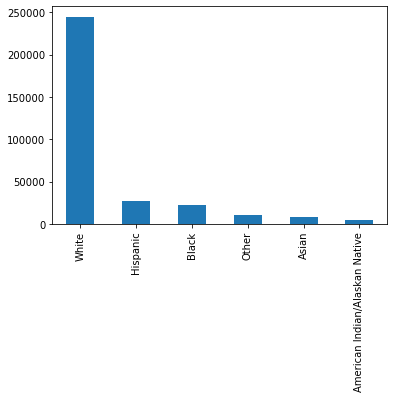

In [30]:
# Check the values of Race column
clean_cvt_smote_df["Race"].value_counts().plot(kind="bar")

In [31]:
# Get dummies for Race column
clean_cvt_smote_df = pd.get_dummies(clean_cvt_smote_df)

In [32]:
clean_cvt_smote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319073 non-null  int64  
 1   BMI                                  319073 non-null  float64
 2   Smoking                              319073 non-null  int64  
 3   AlcoholDrinking                      319073 non-null  int64  
 4   PhysicalHealth                       319073 non-null  float64
 5   MentalHealth                         319073 non-null  float64
 6   DiffWalking                          319073 non-null  int64  
 7   Sex                                  319073 non-null  int64  
 8   AgeCategory                          319073 non-null  int64  
 9   PhysicalActivity                     319073 non-null  int64  
 10  GenHealth                            319073 non-null  int64  
 11  SleepTime    

In [33]:
clean_cvt_smote_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,3.0,30.0,0,0,55,1,3,5.0,1,0,0,0,0,0,1
1,0,20.34,0,0,0.0,0.0,0,0,80,1,3,7.0,0,0,0,0,0,0,1
2,0,26.58,1,0,20.0,30.0,0,1,65,1,1,8.0,1,0,0,0,0,0,1
3,0,24.21,0,0,0.0,0.0,0,0,75,0,2,6.0,0,0,0,0,0,0,1
4,0,23.71,0,0,28.0,0.0,1,0,40,1,3,8.0,0,0,0,0,0,0,1


In [34]:
pip install threadpoolctl==3.1.0

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [35]:
# SMOTE
X_s = clean_cvt_smote_df.drop(columns="HeartDisease")
y_s = clean_cvt_smote_df["HeartDisease"]

X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size = 0.3, random_state=42)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

# Adapt to data
X_smote, y_smote = sm.fit_resample(X_s_train, y_s_train)
print('SMOTE sampled dataset shape %s' % Counter(y_smote))

SMOTE sampled dataset shape Counter({0: 204260, 1: 204260})


#### Check the Dimentions after sampling

I got dummies of Race column for SMOTE, so I'll create plots for Race column separately.

In [64]:
X_train.head()

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma
176993,27.12,Yes,No,0.0,2.0,No,Male,35-39,White,No,Very good,8.0,No
267593,30.23,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Good,7.0,No
175707,32.55,No,No,0.0,0.0,No,Male,60-64,White,Yes,Very good,6.0,No
317039,33.07,No,No,0.0,0.0,No,Female,55-59,Hispanic,Yes,Very good,6.0,No
262926,23.06,No,No,0.0,0.0,No,Male,30-34,Black,Yes,Excellent,7.0,No


In [65]:
X_train["BMI"].value_counts()

26.63    2620
27.46    1947
27.44    1941
24.41    1908
27.12    1746
         ... 
52.22       1
30.16       1
16.53       1
15.12       1
38.46       1
Name: BMI, Length: 3121, dtype: int64

BMI column has meny values, so I'll create this plot separately as well.

In [66]:
X_smote["PhysicalHealth"].value_counts()

0.000000     253683
30.000000     44369
2.000000      13857
5.000000       8625
3.000000       8098
              ...  
3.686407          1
29.470646         1
2.705959          1
9.062209          1
8.427705          1
Name: PhysicalHealth, Length: 34742, dtype: int64

In [67]:
X_smote["SleepTime"].value_counts()

8.000000    107641
7.000000     93558
6.000000     66038
5.000000     17083
9.000000     14781
             ...  
7.369635         1
7.769209         1
7.270863         1
7.074456         1
7.918155         1
Name: SleepTime, Length: 88093, dtype: int64

Also, SMOTE created new values that close to the original data, so some of columns got extra values. Therefore, I'll create separate plots for those columns too.

In [68]:
y_under_sampled.value_counts()

No     19091
Yes    19091
Name: HeartDisease, dtype: int64

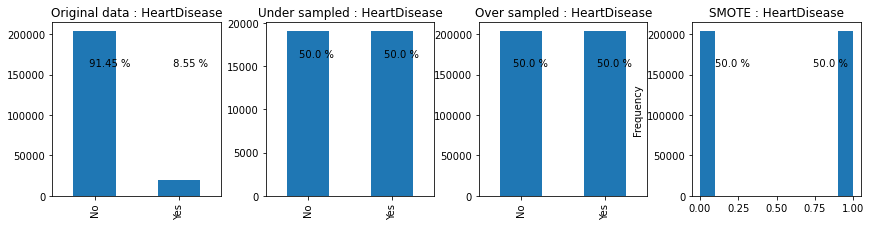

In [69]:
plt.subplots(1, 4, figsize=(12, 3))
plt.tight_layout()

plt.subplot(1, 4, 1)
y_train.value_counts().sort_index().plot(kind="bar")
plt.text(-0.1, 160000, f"{(y_train.value_counts()[0]/len(y_train))*100: .2f} %")
plt.text(0.9, 160000, f"{(y_train.value_counts()[1]/len(y_train))*100: .2f} %")
plt.title(f"Original data : HeartDisease")
    
plt.subplot(1, 4, 2)
y_under_sampled.value_counts().sort_index().plot(kind="bar")
plt.text(-0.1, 16000, f"{(y_under_sampled.value_counts()[0]/len(y_under_sampled))*100} %")
plt.text(0.9, 16000, f"{(y_under_sampled.value_counts()[1]/len(y_under_sampled))*100} %")
plt.title(f"Under sampled : HeartDisease")

plt.subplot(1, 4, 3)
y_over_sampled.value_counts().sort_index().plot(kind="bar")
plt.text(-0.1, 160000, f"{(y_over_sampled.value_counts()[0]/len(y_over_sampled))*100} %")
plt.text(0.9, 160000, f"{(y_over_sampled.value_counts()[1]/len(y_over_sampled))*100} %")
plt.title(f"Over sampled : HeartDisease")
    
plt.subplot(1, 4, 4)
y_smote.plot(kind="hist")
plt.text(0.1, 160000, f"{(y_over_sampled.value_counts()[0]/len(y_over_sampled))*100} %")
plt.text(0.74, 160000, f"{(y_over_sampled.value_counts()[1]/len(y_over_sampled))*100} %")
plt.title(f"SMOTE : HeartDisease")
    
plt.show()

In [70]:
# Bar plot
bar_columns = ["Smoking", "AlcoholDrinking", "DiffWalking", "Sex", "PhysicalActivity", "Asthma"]

In [71]:
# Histgram
hist_columns = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

In [72]:
X_over_sampled["PhysicalActivity"].value_counts().sort_index()

No     117169
Yes    291351
Name: PhysicalActivity, dtype: int64

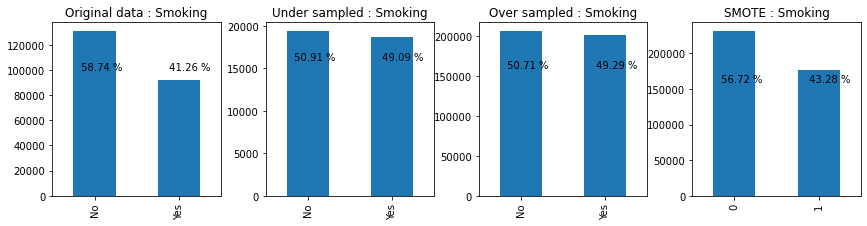

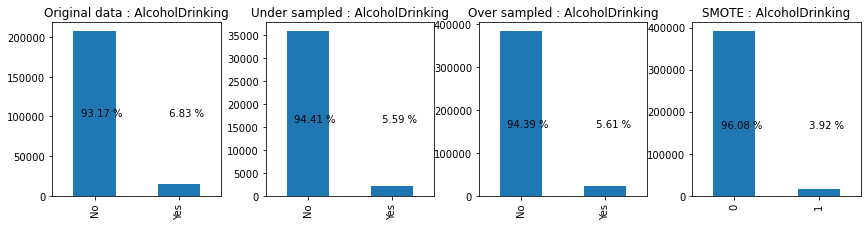

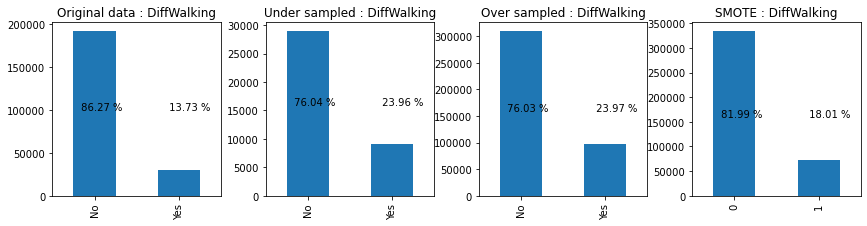

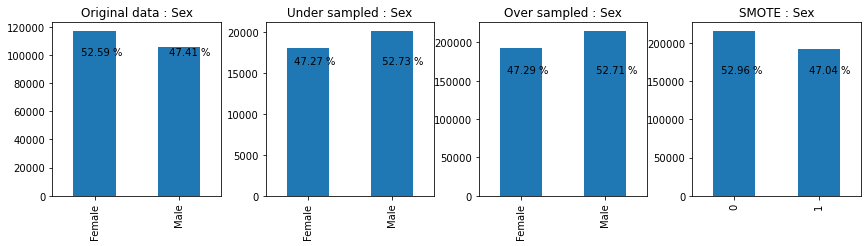

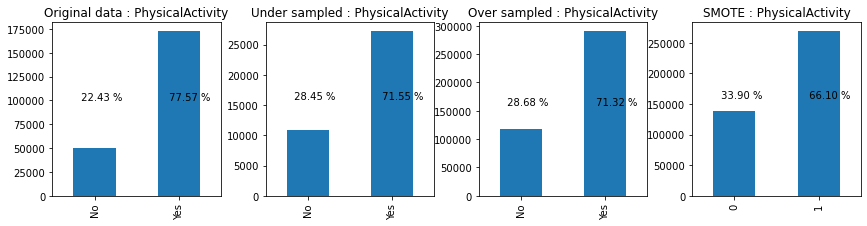

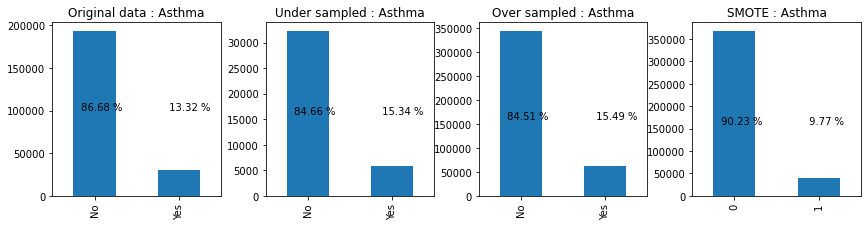

In [73]:
for column in bar_columns:
    plt.subplots(1, 4, figsize=(12, 3))
    plt.tight_layout()
    
    plt.subplot(1, 4, 1)
    X_train[column].value_counts().sort_index().plot(kind="bar")
    plt.text(-0.2, 100000, f"{(X_train[column].value_counts().sort_index()[0]/len(X_train[column]))*100: .2f} %")
    plt.text(0.85, 100000, f"{(X_train[column].value_counts().sort_index()[1]/len(X_train[column]))*100: .2f} %")
    plt.title(f"Original data : {column}")
    
    plt.subplot(1, 4, 2)
    X_under_sampled[column].value_counts().sort_index().plot(kind="bar")
    plt.text(-0.2, 16000, f"{(X_under_sampled[column].value_counts().sort_index()[0]/len(X_under_sampled[column]))*100: .2f} %")
    plt.text(0.85, 16000, f"{(X_under_sampled[column].value_counts().sort_index()[1]/len(X_under_sampled[column]))*100: .2f} %")
    plt.title(f"Under sampled : {column}")

    plt.subplot(1, 4, 3)
    X_over_sampled[column].value_counts().sort_index().plot(kind="bar")
    plt.text(-0.2, 160000, f"{(X_over_sampled[column].value_counts().sort_index()[0]/len(X_over_sampled[column]))*100: .2f} %")
    plt.text(0.85, 160000, f"{(X_over_sampled[column].value_counts().sort_index()[1]/len(X_over_sampled[column]))*100: .2f} %")
    plt.title(f"Over sampled : {column}")
    
    plt.subplot(1, 4, 4)
    X_smote[column].value_counts().sort_index().plot(kind="bar")
    plt.text(-0.2, 160000, f"{(X_smote[column].value_counts().sort_index()[0]/len(X_smote[column]))*100: .2f} %")
    plt.text(0.85, 160000, f"{(X_smote[column].value_counts().sort_index()[1]/len(X_smote[column]))*100: .2f} %")
    plt.title(f"SMOTE : {column}")

    plt.show()

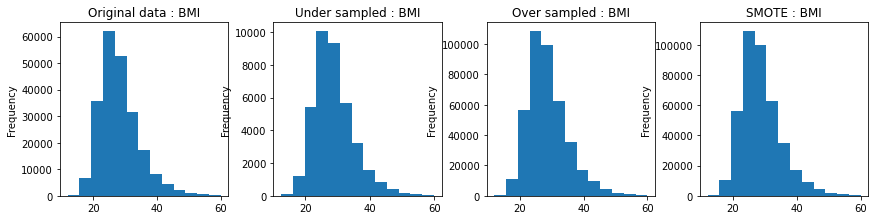

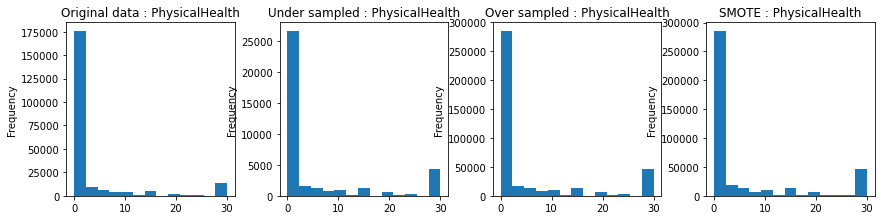

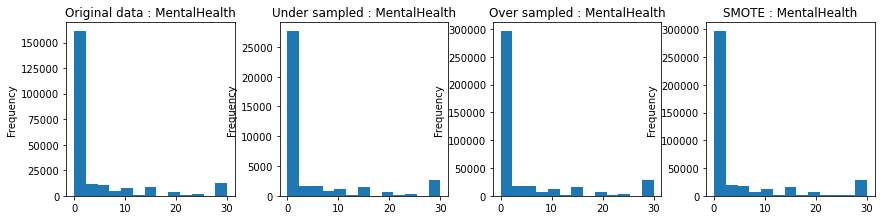

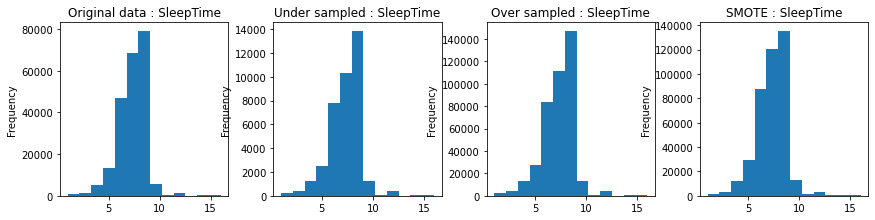

In [74]:
for column in hist_columns:
    
    plt.subplots(1, 4, figsize=(12, 3))
    plt.tight_layout()
    
    plt.subplot(1, 4, 1)
    X_train[column].plot(kind="hist", bins=13)
    plt.title(f"Original data : {column}")
    
    plt.subplot(1, 4, 2)
    X_under_sampled[column].plot(kind="hist", bins=13)
    plt.title(f"Under sampled : {column}")
    
    plt.subplot(1, 4, 3)
    X_over_sampled[column].plot(kind="hist", bins=13)
    plt.title(f"Over sampled : {column}")
    
    plt.subplot(1, 4, 4)
    X_smote[column].plot(kind="hist", bins=13)
    plt.title(f"SMOTE : {column}")
    
    plt.show()

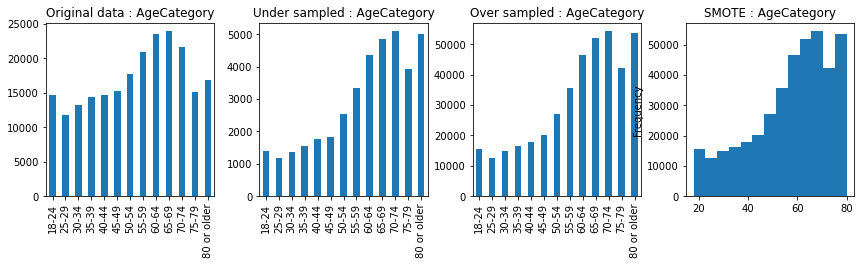

In [75]:
# Plot for AgeCategory column
plt.subplots(1, 4, figsize=(12, 3))
plt.tight_layout()
    
plt.subplot(1, 4, 1)
X_train["AgeCategory"].value_counts().sort_index().plot(kind="bar")
plt.title(f"Original data : AgeCategory")    
    
plt.subplot(1, 4, 2)
X_under_sampled["AgeCategory"].value_counts().sort_index().plot(kind="bar")
plt.title(f"Under sampled : AgeCategory")

plt.subplot(1, 4, 3)
X_over_sampled["AgeCategory"].value_counts().sort_index().plot(kind="bar")
plt.title(f"Over sampled : AgeCategory")
    
plt.subplot(1, 4, 4)
X_smote["AgeCategory"].plot(kind="hist", bins=13)
plt.title(f"SMOTE : AgeCategory")
    
plt.show()

In [76]:
# Create a data frame with Race_ columns of clean_cvt_smote_df
binary_df = clean_cvt_smote_df.loc[:, ['Race_White', 'Race_Hispanic', 'Race_Black', 'Race_Other', 'Race_Asian', 'Race_American Indian/Alaskan Native']]
binary_df

,Race_White,Race_Hispanic,Race_Black,Race_Other,Race_Asian,Race_American Indian/Alaskan Native
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
319068,0,1,0,0,0,0
319069,0,1,0,0,0,0
319070,0,1,0,0,0,0
319071,0,1,0,0,0,0


In [77]:
race_df = pd.melt(binary_df)

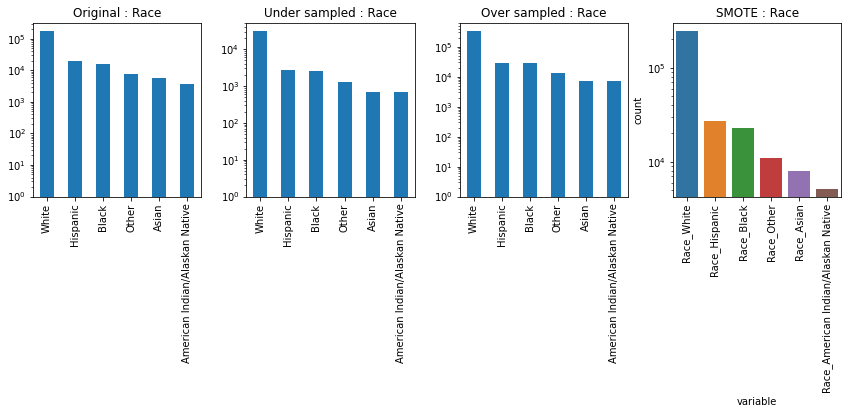

In [78]:
# Plot for Race column
plt.subplots(1, 4, figsize=(12, 3))
plt.tight_layout()
    
plt.subplot(1, 4, 1)
X_train["Race"].value_counts().plot(kind="bar", log=True)
plt.title("Original : Race")  
    
plt.subplot(1, 4, 2)
X_under_sampled["Race"].value_counts().plot(kind="bar", log=True)
plt.title("Under sampled : Race")
    
plt.subplot(1, 4, 3)
X_over_sampled["Race"].value_counts().plot(kind="bar", log=True)
plt.title("Over sampled : Race")
    
plt.subplot(1, 4, 4)
sns.countplot(x="variable", data=race_df[race_df["value"]==1], log=True)
plt.title("SMOTE : Race")
plt.xticks(rotation=90)
    
plt.show()

I'd like to create plots for GenHealth column with same order, so I'll create the plots separatle.

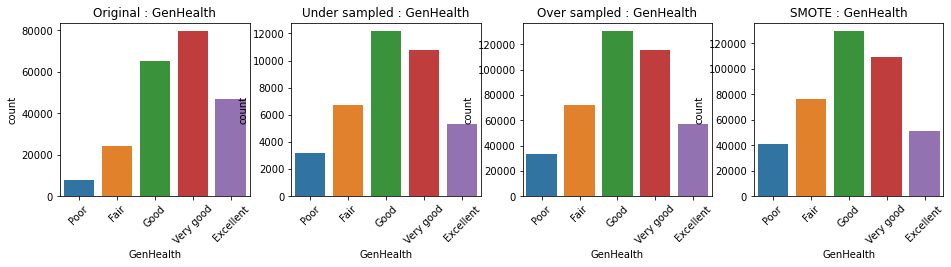

In [79]:
health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

plt.subplots(1, 4, figsize=(13, 3))
plt.tight_layout()
    
plt.subplot(1, 4, 1)
sns.countplot(x='GenHealth', order=health_order, data=X_train)
plt.title("Original : GenHealth")
plt.xticks(rotation=45)    
    
plt.subplot(1, 4, 2)
sns.countplot(x='GenHealth', order=health_order, data=X_under_sampled)
plt.title("Under sampled : GenHealth")
plt.xticks(rotation=45)
    
plt.subplot(1, 4, 3)
sns.countplot(x='GenHealth', order=health_order, data=X_over_sampled)
plt.title("Over sampled : GenHealth")
plt.xticks(rotation=45)
    
plt.subplot(1, 4, 4)
sns.countplot(x='GenHealth', data=X_smote)
plt.title("SMOTE : GenHealth")
plt.xticks([0, 1, 2, 3, 4], health_order, rotation=45)
    
plt.show()

From all the plots above, under sampled data and over sampled data have almost the same blance on each values, but since I restored balance, some of the values, which might increase heart disease existance, increased. Plots of SMOTE data have mostly the same shape as the other sampled data, however, you can see small differences between SMOTE data and the others. For example, the female value is greater than the male value in SMOTE data same as the original data, but it's opposite in the other sampled data. The values of other columns also have a different balance than the other data.

### Exploring Data

I splited the data into train set and test set and sampled it in 3 ways. So I'll explorer only each sampled train set.

In [80]:
original_df = X_train
original_df["HeartDisease"] = y_train
original_df

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,HeartDisease
176993,27.12,Yes,No,0.0,2.0,No,Male,35-39,White,No,Very good,8.0,No,No
267593,30.23,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Good,7.0,No,No
175707,32.55,No,No,0.0,0.0,No,Male,60-64,White,Yes,Very good,6.0,No,No
317039,33.07,No,No,0.0,0.0,No,Female,55-59,Hispanic,Yes,Very good,6.0,No,No
262926,23.06,No,No,0.0,0.0,No,Male,30-34,Black,Yes,Excellent,7.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,26.62,No,No,0.0,0.0,No,Female,40-44,White,Yes,Excellent,6.0,No,No
259178,25.04,No,No,0.0,0.0,No,Male,25-29,White,Yes,Excellent,7.0,No,No
131932,36.05,No,No,0.0,5.0,No,Female,18-24,Black,Yes,Fair,6.0,No,No
146867,27.44,No,No,0.0,0.0,No,Female,40-44,White,Yes,Very good,8.0,No,No


In [81]:
under_sampled_df = X_under_sampled
under_sampled_df["HeartDisease"] = y_under_sampled
under_sampled_df

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,HeartDisease
74952,40.01,Yes,No,0.0,0.0,No,Male,65-69,White,No,Fair,8.0,No,No
141216,25.75,No,No,5.0,0.0,No,Female,80 or older,White,Yes,Poor,6.0,No,No
54269,24.80,No,No,0.0,0.0,No,Female,40-44,Black,No,Excellent,8.0,No,No
264560,38.73,No,No,7.0,14.0,Yes,Female,60-64,Hispanic,No,Good,14.0,No,No
42405,34.11,Yes,No,0.0,0.0,No,Male,70-74,Black,Yes,Very good,8.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256508,24.28,No,No,0.0,0.0,No,Male,75-79,White,Yes,Very good,7.0,No,Yes
174073,27.44,No,No,30.0,0.0,Yes,Female,50-54,White,No,Poor,6.0,No,Yes
3890,25.23,No,No,0.0,0.0,No,Female,75-79,White,Yes,Good,7.0,No,Yes
67435,23.09,Yes,No,15.0,3.0,No,Male,70-74,White,Yes,Very good,7.0,No,Yes


In [82]:
under_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38182 entries, 74952 to 207892
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               38182 non-null  float64
 1   Smoking           38182 non-null  object 
 2   AlcoholDrinking   38182 non-null  object 
 3   PhysicalHealth    38182 non-null  float64
 4   MentalHealth      38182 non-null  float64
 5   DiffWalking       38182 non-null  object 
 6   Sex               38182 non-null  object 
 7   AgeCategory       38182 non-null  object 
 8   Race              38182 non-null  object 
 9   PhysicalActivity  38182 non-null  object 
 10  GenHealth         38182 non-null  object 
 11  SleepTime         38182 non-null  float64
 12  Asthma            38182 non-null  object 
 13  HeartDisease      38182 non-null  object 
dtypes: float64(4), object(10)
memory usage: 5.4+ MB


In [83]:
over_sampled_df = X_over_sampled
over_sampled_df["HeartDisease"] = y_over_sampled
over_sampled_df

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,HeartDisease
0,27.12,Yes,No,0.0,2.0,No,Male,35-39,White,No,Very good,8.0,No,No
1,30.23,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Good,7.0,No,No
2,32.55,No,No,0.0,0.0,No,Male,60-64,White,Yes,Very good,6.0,No,No
3,33.07,No,No,0.0,0.0,No,Female,55-59,Hispanic,Yes,Very good,6.0,No,No
4,23.06,No,No,0.0,0.0,No,Male,30-34,Black,Yes,Excellent,7.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408515,42.87,No,No,30.0,0.0,Yes,Female,60-64,Black,No,Good,6.0,No,Yes
408516,24.41,No,No,0.0,0.0,No,Male,65-69,White,No,Good,8.0,No,Yes
408517,33.00,No,No,0.0,0.0,No,Male,60-64,White,No,Fair,6.0,No,Yes
408518,31.32,Yes,No,3.0,2.0,No,Female,65-69,White,Yes,Good,7.0,Yes,Yes


In [84]:
over_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408520 entries, 0 to 408519
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               408520 non-null  float64
 1   Smoking           408520 non-null  object 
 2   AlcoholDrinking   408520 non-null  object 
 3   PhysicalHealth    408520 non-null  float64
 4   MentalHealth      408520 non-null  float64
 5   DiffWalking       408520 non-null  object 
 6   Sex               408520 non-null  object 
 7   AgeCategory       408520 non-null  object 
 8   Race              408520 non-null  object 
 9   PhysicalActivity  408520 non-null  object 
 10  GenHealth         408520 non-null  object 
 11  SleepTime         408520 non-null  float64
 12  Asthma            408520 non-null  object 
 13  HeartDisease      408520 non-null  object 
dtypes: float64(4), object(10)
memory usage: 43.6+ MB


In [85]:
smote_df = X_smote
smote_df["HeartDisease"] = y_smote
smote_df

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,HeartDisease
0,27.120000,1,0,0.000000,2.0,0,1,35,0,3,8.000000,0,0,0,0,0,0,1,0
1,30.230000,0,0,0.000000,0.0,0,0,18,0,2,7.000000,0,0,0,0,1,0,0,0
2,32.550000,0,0,0.000000,0.0,0,1,60,1,3,6.000000,0,0,0,0,0,0,1,0
3,33.070000,0,0,0.000000,0.0,0,0,55,1,3,6.000000,0,0,0,0,1,0,0,0
4,23.060000,0,0,0.000000,0.0,0,1,30,1,4,7.000000,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408515,25.856492,0,0,8.427705,10.0,0,0,80,0,1,9.371082,0,0,0,0,0,0,1,1
408516,27.176702,0,0,0.000000,0.0,0,1,65,1,3,7.000000,0,0,0,0,0,0,1,1
408517,24.343159,1,0,0.000000,0.0,0,1,70,1,2,8.000000,0,0,0,0,0,0,0,1
408518,32.141741,1,0,2.000000,0.0,0,1,75,1,2,7.918155,0,0,0,0,0,0,1,1


In [86]:
smote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408520 entries, 0 to 408519
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  408520 non-null  float64
 1   Smoking                              408520 non-null  int64  
 2   AlcoholDrinking                      408520 non-null  int64  
 3   PhysicalHealth                       408520 non-null  float64
 4   MentalHealth                         408520 non-null  float64
 5   DiffWalking                          408520 non-null  int64  
 6   Sex                                  408520 non-null  int64  
 7   AgeCategory                          408520 non-null  int64  
 8   PhysicalActivity                     408520 non-null  int64  
 9   GenHealth                            408520 non-null  int64  
 10  SleepTime                            408520 non-null  float64
 11  Asthma       

In [87]:
print(f"original_df:\n{original_df.describe()}")
print("-----------------------------------------------------------------------------")
print(f"under_sampled_df:\n{under_sampled_df.describe()}")
print("-----------------------------------------------------------------------------")
print(f"\nover_sampled_df:\n{over_sampled_df.describe()}")
print("-----------------------------------------------------------------------------")
print(f"\nsmote_df:\n{smote_df.describe()}")

original_df:
                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  223351.000000   223351.000000  223351.000000  223351.000000
mean       28.270665        3.350041       3.868691       7.086147
std         6.176432        7.921776       7.912470       1.395521
min        12.020000        0.000000       0.000000       1.000000
25%        24.030000        0.000000       0.000000       6.000000
50%        27.320000        0.000000       0.000000       7.000000
75%        31.380000        2.000000       3.000000       8.000000
max        59.970000       30.000000      30.000000      16.000000
-----------------------------------------------------------------------------
under_sampled_df:
                BMI  PhysicalHealth  MentalHealth     SleepTime
count  38182.000000    38182.000000  38182.000000  38182.000000
mean      28.814878        5.391441      4.196663      7.104683
std        6.295687        9.977891      8.489744      1.549060
min       12.400000        0.000

In [88]:
# Split data into "Yes/No" values of HeartDisease column
original_df_yes = original_df[original_df["HeartDisease"]=="Yes"]
original_df_no = original_df[original_df["HeartDisease"]=="No"]

under_sampled_df_yes = under_sampled_df[under_sampled_df["HeartDisease"]=="Yes"]
under_sampled_df_no = under_sampled_df[under_sampled_df["HeartDisease"]=="No"]
    
over_sampled_df_yes = over_sampled_df[over_sampled_df["HeartDisease"]=="Yes"]
over_sampled_df_no = over_sampled_df[over_sampled_df["HeartDisease"]=="No"]
    
smote_df_yes = smote_df[smote_df["HeartDisease"]==1]
smote_df_no = smote_df[smote_df["HeartDisease"]==0]

In [89]:
# Bar plot for columns with "Yes/No" values
bar_columns2 = ["Smoking", "AlcoholDrinking", "DiffWalking", "PhysicalActivity", "Asthma"]

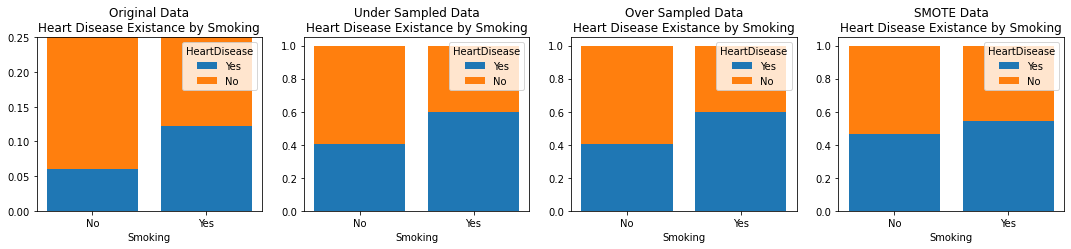

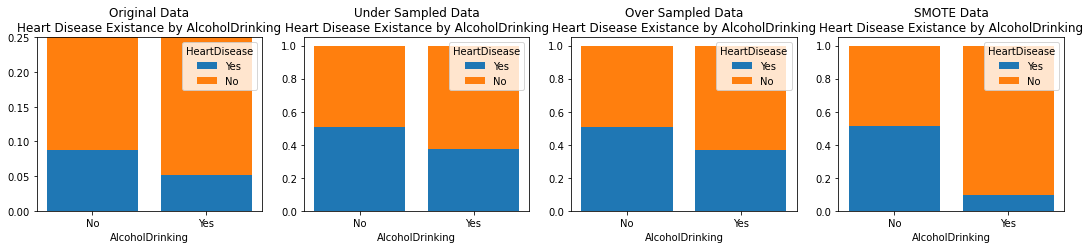

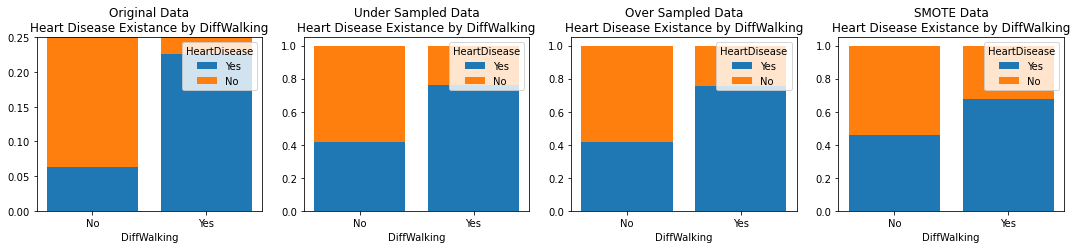

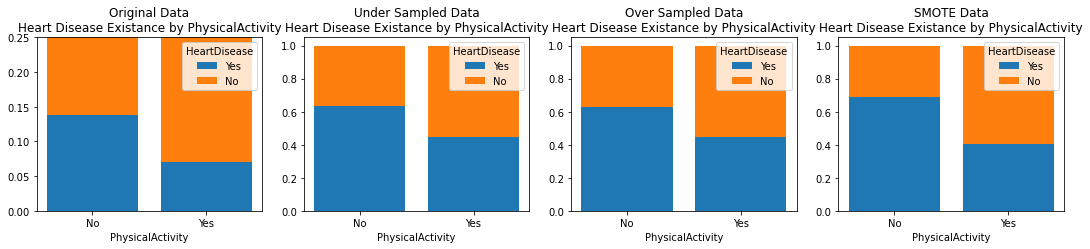

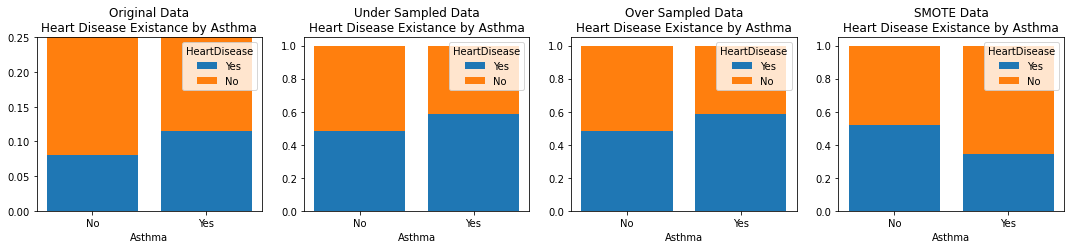

In [90]:
# Create plots of percentage for heart disease existance by columns with "Yes/No" values
order = ["No", "Yes"]

for column in bar_columns2:
    
    fig, ax = plt.subplots(1, 4, figsize=(15, 3))
    plt.tight_layout()
    
    # Original data plots
    original_data_yes = original_df_yes.groupby([column])["HeartDisease"].count().sort_index() / original_df.groupby(column)["HeartDisease"].count()
    original_data_no = original_df_no.groupby([column])["HeartDisease"].count().sort_index() / original_df.groupby(column)["HeartDisease"].count()

    plt.subplot(1, 4, 1)
    ax[0].bar(original_data_yes.index, original_data_yes, label="Yes")
    ax[0].bar(original_data_no.index, original_data_no, bottom=original_data_yes, label="No")
    plt.title(f"Original Data\nHeart Disease Existance by {column}")
    plt.xlabel(column)
    plt.ylim(0, 0.25)
    plt.legend(title="HeartDisease", loc="upper right", bbox_to_anchor=(1, 1))
    
    # Under sampled data plots
    under_data_yes = under_sampled_df_yes.groupby([column])["HeartDisease"].count().sort_index() / under_sampled_df.groupby(column)["HeartDisease"].count()
    under_data_no = under_sampled_df_no.groupby([column])["HeartDisease"].count().sort_index() / under_sampled_df.groupby(column)["HeartDisease"].count()

    plt.subplot(1, 4, 2)
    ax[1].bar(under_data_yes.index, under_data_yes, label="Yes")
    ax[1].bar(under_data_no.index, under_data_no, bottom=under_data_yes, label="No")
    plt.title(f"Under Sampled Data\nHeart Disease Existance by {column}")
    plt.xlabel(column)
    plt.legend(title="HeartDisease", loc="upper right", bbox_to_anchor=(1, 1))
    
    # Orver sampled data plots
    over_data_yes = over_sampled_df_yes.groupby([column])["HeartDisease"].count().sort_index() / over_sampled_df.groupby(column)["HeartDisease"].count()
    over_data_no = over_sampled_df_no.groupby([column])["HeartDisease"].count().sort_index() / over_sampled_df.groupby(column)["HeartDisease"].count()

    plt.subplot(1, 4, 3)
    ax[2].bar(over_sampled_df[column].unique(), over_data_yes, label="Yes", tick_label=order)
    ax[2].bar(over_sampled_df[column].unique(), over_data_no, bottom=over_data_yes, label="No", tick_label=order)
    plt.title(f"Over Sampled Data\nHeart Disease Existance by {column}")
    plt.xlabel(column)
    plt.legend(title="HeartDisease", loc="upper right", bbox_to_anchor=(1, 1))
    
    # SMOTE data plots
    smote_data_yes = smote_df_yes.groupby([column])["HeartDisease"].count().sort_index() / smote_df.groupby(column)["HeartDisease"].count()
    smote_data_no = smote_df_no.groupby([column])["HeartDisease"].count().sort_index() / smote_df.groupby(column)["HeartDisease"].count()

    plt.subplot(1, 4, 4)
    ax[3].bar(np.sort(smote_df[column].unique()), smote_data_yes, label="Yes")
    ax[3].bar(np.sort(smote_df[column].unique()), smote_data_no, bottom=smote_data_yes, label="No")
    plt.title(f"SMOTE Data\nHeart Disease Existance by {column}")
    plt.xlabel(column)
    plt.xticks([0, 1], ["No", "Yes"])
    plt.legend(title="HeartDisease", loc="upper right", bbox_to_anchor=(1, 1))
    
    plt.show()

In [91]:
# Histgram
hist_columns = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

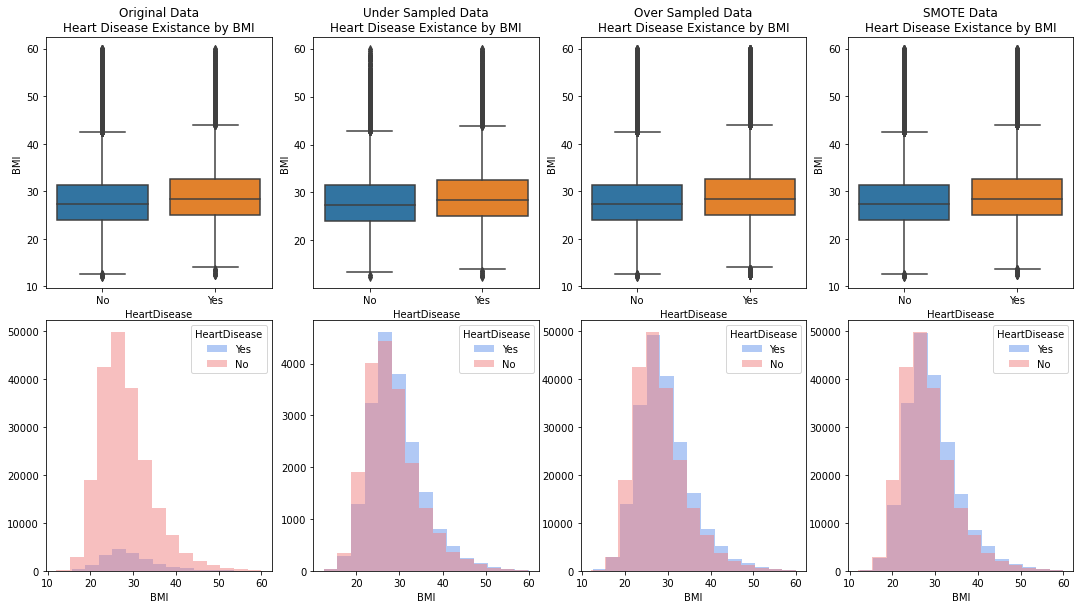

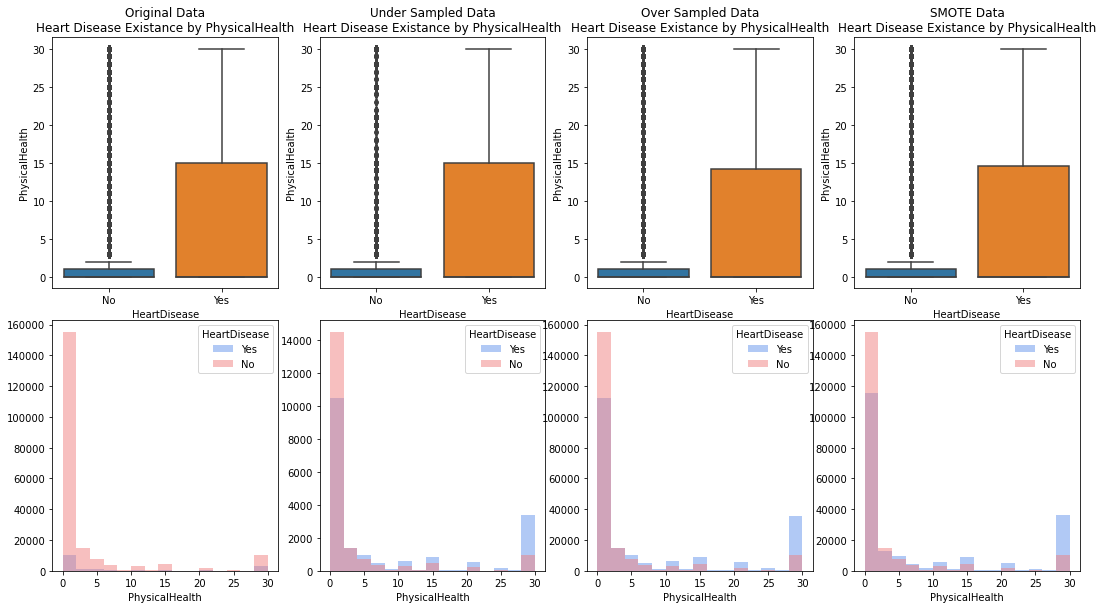

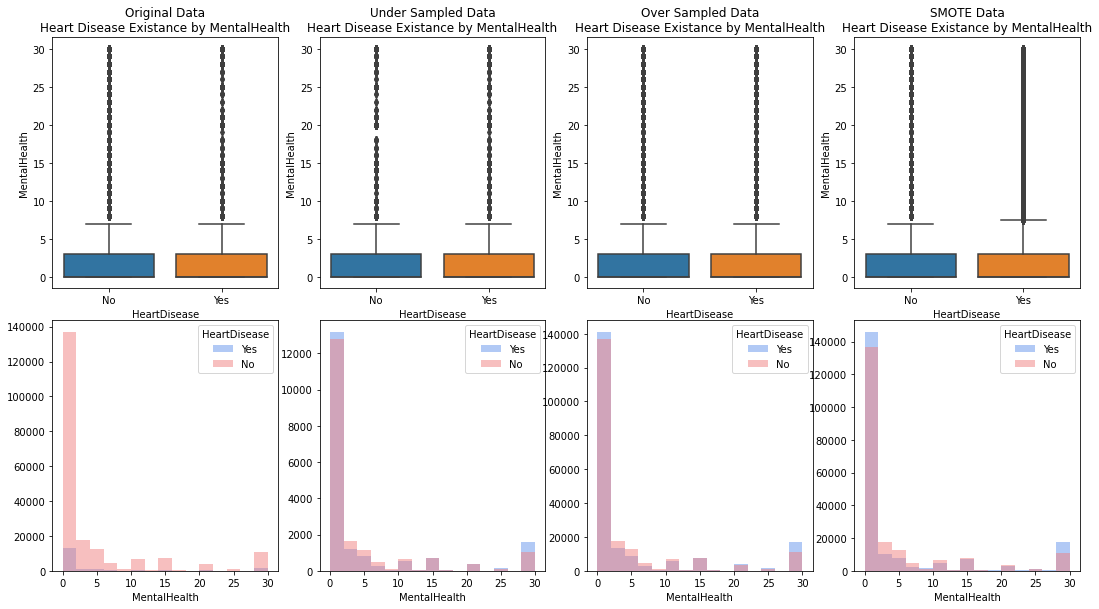

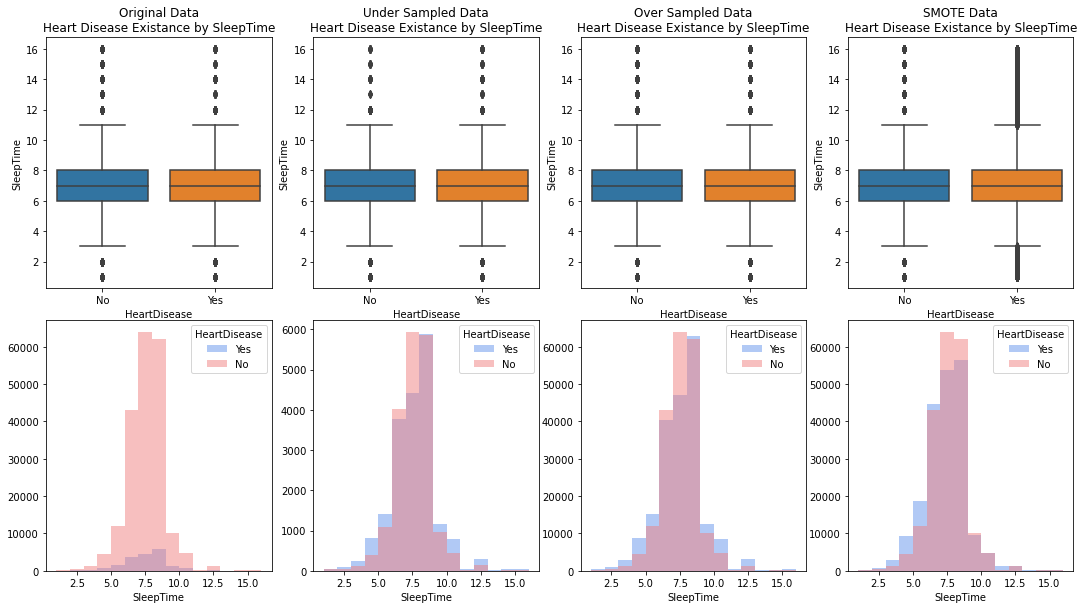

In [92]:
# Create plots of percentage for heart disease existance by columns with continuance values
order = ["No", "Yes"]

for column in hist_columns:
    
    fig, ax = plt.subplots(2, 4, figsize=(15, 8))
    plt.tight_layout()
    
    # Original data plots
    plt.subplot(2, 4, 1)
    sns.boxplot(x='HeartDisease', y=column, data=original_df)
    plt.title(f"Original Data\nHeart Disease Existance by {column}")

    plt.subplot(2, 4, 5)
    plt.hist(original_df_yes[column], bins=15, alpha=0.5, color="cornflowerblue", label="Yes")
    plt.hist(original_df_no[column], bins=15, alpha=0.5, color="lightcoral", label="No")
    plt.xlabel(column)
    plt.legend(title="HeartDisease")
    
    # Under sampled data plots
    plt.subplot(2, 4, 2)
    sns.boxplot(x='HeartDisease', y=column, data=under_sampled_df)
    plt.title(f"Under Sampled Data\nHeart Disease Existance by {column}")

    plt.subplot(2, 4, 6)
    plt.hist(under_sampled_df_yes[column], bins=15, alpha=0.5, color="cornflowerblue", label="Yes")
    plt.hist(under_sampled_df_no[column], bins=15, alpha=0.5, color="lightcoral", label="No")
    plt.xlabel(column)
    plt.legend(title="HeartDisease")
    
    # Orver sampled data plots
    plt.subplot(2, 4, 3)
    sns.boxplot(x='HeartDisease', y=column, data=over_sampled_df)
    plt.title(f"Over Sampled Data\nHeart Disease Existance by {column}")

    plt.subplot(2, 4, 7)
    plt.hist(over_sampled_df_yes[column], bins=15, alpha=0.5, color="cornflowerblue", label="Yes")
    plt.hist(over_sampled_df_no[column], bins=15, alpha=0.5, color="lightcoral", label="No")
    plt.legend(title="HeartDisease")
    plt.xlabel(column)
    plt.legend(title="HeartDisease", loc="upper right", bbox_to_anchor=(1, 1))
    
    # SMOTE data plots
    plt.subplot(2, 4, 4)
    sns.boxplot(x='HeartDisease', y=column, data=smote_df)
    plt.title(f"SMOTE Data\nHeart Disease Existance by {column}")
    plt.xticks([0, 1], ["No", "Yes"])

    plt.subplot(2, 4, 8)
    plt.hist(smote_df_yes[column], bins=15, alpha=0.5, color="cornflowerblue", label="Yes")
    plt.hist(smote_df_no[column], bins=15, alpha=0.5, color="lightcoral", label="No")
    plt.xlabel(column)
    plt.legend(title="HeartDisease", loc="upper right", bbox_to_anchor=(1, 1))
    
    plt.show()

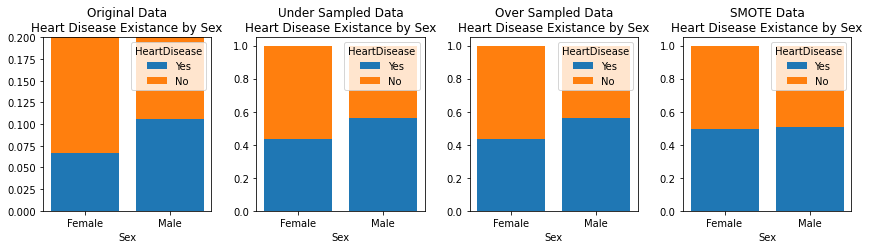

In [93]:
# Create plots of percentage for heart disease existance by Sex column
sex_order = ["Female", "Male"]

fig, ax = plt.subplots(1, 4, figsize=(12, 3))
plt.tight_layout()
   
# Original data plot
original_data_yes = original_df_yes.groupby(["Sex"])["HeartDisease"].count().sort_index() / original_df.groupby("Sex")["HeartDisease"].count()
original_data_no = original_df_no.groupby(["Sex"])["HeartDisease"].count().sort_index() / original_df.groupby("Sex")["HeartDisease"].count()

plt.subplot(1, 4, 1)
ax[0].bar(original_df["Sex"].unique(), original_data_yes, label="Yes", tick_label=sex_order)
ax[0].bar(original_df["Sex"].unique(), original_data_no, bottom=original_data_yes, label="No", tick_label=sex_order)
plt.title(f"Original Data\nHeart Disease Existance by Sex")
plt.xlabel("Sex")
plt.ylim(0, 0.2)
plt.legend(title="HeartDisease", loc="upper right", bbox_to_anchor=(1, 1)) 
    
# Under sampled data plot
under_data_yes = under_sampled_df_yes.groupby(["Sex"])["HeartDisease"].count().sort_index() / under_sampled_df.groupby("Sex")["HeartDisease"].count()
under_data_no = under_sampled_df_no.groupby(["Sex"])["HeartDisease"].count().sort_index() / under_sampled_df.groupby("Sex")["HeartDisease"].count()

plt.subplot(1, 4, 2)
ax[1].bar(under_sampled_df["Sex"].unique(), under_data_yes, label="Yes", tick_label=sex_order)
ax[1].bar(under_sampled_df["Sex"].unique(), under_data_no, bottom=under_data_yes, label="No", tick_label=sex_order)
plt.title(f"Under Sampled Data\nHeart Disease Existance by Sex")
plt.xlabel("Sex")
plt.legend(title="HeartDisease", loc="upper right", bbox_to_anchor=(1, 1))
    
# Orver sampled data plot
over_data_yes = over_sampled_df_yes.groupby(["Sex"])["HeartDisease"].count().sort_index() / over_sampled_df.groupby("Sex")["HeartDisease"].count()
over_data_no = over_sampled_df_no.groupby(["Sex"])["HeartDisease"].count().sort_index() / over_sampled_df.groupby("Sex")["HeartDisease"].count()

plt.subplot(1, 4, 3)
ax[2].bar(over_sampled_df["Sex"].unique(), over_data_yes, label="Yes", tick_label=sex_order)
ax[2].bar(over_sampled_df["Sex"].unique(), over_data_no, bottom=over_data_yes, label="No", tick_label=sex_order)
plt.title(f"Over Sampled Data\nHeart Disease Existance by Sex")
plt.xlabel("Sex")
plt.legend(title="HeartDisease", loc="upper right", bbox_to_anchor=(1, 1))
    
# SMOTE data plot
smote_data_yes = smote_df_yes.groupby(["Sex"])["HeartDisease"].count().sort_index() / smote_df.groupby("Sex")["HeartDisease"].count()
smote_data_no = smote_df_no.groupby(["Sex"])["HeartDisease"].count().sort_index() / smote_df.groupby("Sex")["HeartDisease"].count()

plt.subplot(1, 4, 4)
ax[3].bar(np.sort(smote_df["Sex"].unique()), smote_data_yes, label="Yes")
ax[3].bar(np.sort(smote_df["Sex"].unique()), smote_data_no, bottom=smote_data_yes, label="No")
plt.title(f"SMOTE Data\nHeart Disease Existance by Sex")
plt.xlabel("Sex")
plt.xticks([0, 1], ["Female", "Male"])
plt.legend(title="HeartDisease", loc="upper right", bbox_to_anchor=(1, 1))
    
plt.show()

In [94]:
# Binning AgeCategory column in SMOTE dataframe for preparing to create plots
smote_cut = pd.cut(smote_df["AgeCategory"], [17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 100],
      labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'])

smote_df["Cut_AgeCategory"] = smote_cut

smote_df_yes = smote_df[smote_df["HeartDisease"]==1]
smote_df_no = smote_df[smote_df["HeartDisease"]==0]

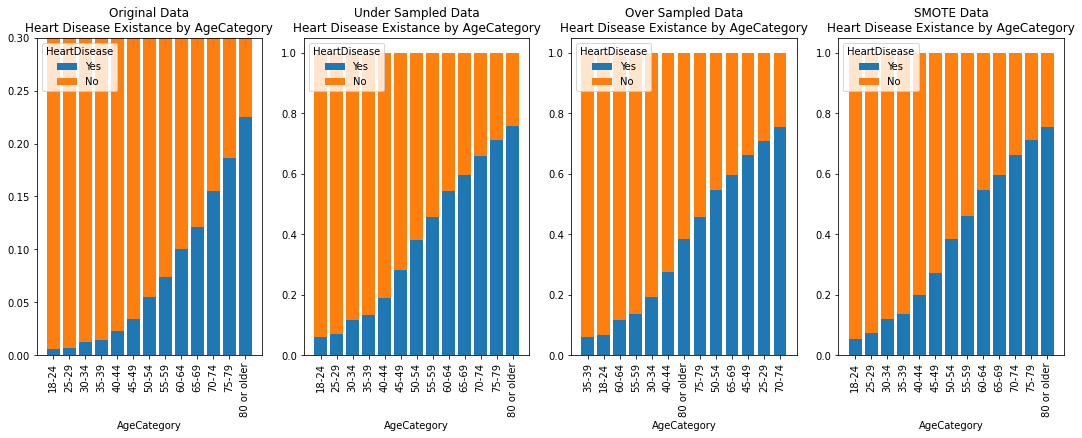

In [95]:
# Create plots of percentage for heart disease existance by AgeCategory column
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
plt.tight_layout()
   
# Original data plot   
original_data_yes = original_df_yes.groupby(["AgeCategory"])["HeartDisease"].count().sort_index() / original_df.groupby("AgeCategory")["HeartDisease"].count()
original_data_no = original_df_no.groupby(["AgeCategory"])["HeartDisease"].count().sort_index() / original_df.groupby("AgeCategory")["HeartDisease"].count()

plt.subplot(1, 4, 1)
ax[0].bar(np.sort(original_df["AgeCategory"].unique()), original_data_yes, label="Yes")
ax[0].bar(np.sort(original_df["AgeCategory"].unique()), original_data_no, bottom=original_data_yes, label="No")
plt.title(f"Original Data\nHeart Disease Existance by AgeCategory")
plt.xlabel("AgeCategory")
plt.xticks(rotation=90)
plt.ylim(0, 0.3)
plt.legend(title="HeartDisease", loc="upper left")    
    
# Under sampled data plot    
under_data_yes = under_sampled_df_yes.groupby(["AgeCategory"])["HeartDisease"].count().sort_index() / under_sampled_df.groupby("AgeCategory")["HeartDisease"].count()
under_data_no = under_sampled_df_no.groupby(["AgeCategory"])["HeartDisease"].count().sort_index() / under_sampled_df.groupby("AgeCategory")["HeartDisease"].count()

plt.subplot(1, 4, 2)
ax[1].bar(np.sort(under_sampled_df["AgeCategory"].unique()), under_data_yes, label="Yes")
ax[1].bar(np.sort(under_sampled_df["AgeCategory"].unique()), under_data_no, bottom=under_data_yes, label="No")
plt.title(f"Under Sampled Data\nHeart Disease Existance by AgeCategory")
plt.xlabel("AgeCategory")
plt.xticks(rotation=90)
plt.legend(title="HeartDisease", loc="upper left")

# Orver sampled data plot
over_data_yes = over_sampled_df_yes.groupby(["AgeCategory"])["HeartDisease"].count().sort_index() / over_sampled_df.groupby("AgeCategory")["HeartDisease"].count()
over_data_no = over_sampled_df_no.groupby(["AgeCategory"])["HeartDisease"].count().sort_index() / over_sampled_df.groupby("AgeCategory")["HeartDisease"].count()

plt.subplot(1, 4, 3)
ax[2].bar(over_sampled_df["AgeCategory"].unique(), over_data_yes, label="Yes")
ax[2].bar(over_sampled_df["AgeCategory"].unique(), over_data_no, bottom=over_data_yes, label="No")
plt.title(f"Over Sampled Data\nHeart Disease Existance by AgeCategory")
plt.xlabel("AgeCategory")
plt.xticks(rotation=90)
plt.legend(title="HeartDisease", loc="upper left")

# SMOTE data plot
smote_data_yes = smote_df_yes.groupby(["Cut_AgeCategory"])["HeartDisease"].count().sort_index() / smote_df.groupby("Cut_AgeCategory")["HeartDisease"].count()
smote_data_no = smote_df_no.groupby(["Cut_AgeCategory"])["HeartDisease"].count().sort_index() / smote_df.groupby("Cut_AgeCategory")["HeartDisease"].count()

plt.subplot(1, 4, 4)
ax[3].bar(np.sort(smote_df["Cut_AgeCategory"].unique()), smote_data_yes, label="Yes")
ax[3].bar(np.sort(smote_df["Cut_AgeCategory"].unique()), smote_data_no, bottom=smote_data_yes, label="No")
plt.title(f"SMOTE Data\nHeart Disease Existance by AgeCategory")
plt.xlabel("AgeCategory")
plt.xticks(rotation=90)
plt.legend(title="HeartDisease", loc="upper left")    


In [96]:
# Check if there are rows that have no race data in SMOTE data

count = 0
for index in range(len(X_smote)):
    if (smote_df.loc[index]["Race_American Indian/Alaskan Native"] == 0) and (smote_df.loc[index]["Race_Asian"]==0) and (smote_df.loc[index]["Race_Black"]==0) and (smote_df.loc[index]["Race_Hispanic"]==0) and (smote_df.loc[index]["Race_Other"]==0) and (smote_df.loc[index]["Race_White"]==0):
        count += 1
        
count

37695

I got 37695 rows with all 0 for race columns from SMOTE process. Now I'll create a new columns of races for creating a plot, and I'll put "No Race" for all 0 value for race columns.

In [97]:
# Create a new column for total Races 
race_values = []
for index in range(len(smote_df)):
    if smote_df.loc[index]["Race_White"] == 1:
        race_values.append("White")
    elif smote_df.loc[index]["Race_Black"] == 1:
        race_values.append("Black")
    elif smote_df.loc[index]["Race_Hispanic"] == 1:
        race_values.append("Hispanic")
    elif smote_df.loc[index]["Race_Other"] == 1:
        race_values.append("Other")
    elif smote_df.loc[index]["Race_Asian"] == 1:
        race_values.append("Asian")
    elif smote_df.loc[index]["Race_American Indian/Alaskan Native"] == 1:
        race_values.append("American Indian/Alaskan Native")
    else:
        race_values.append("No Race")

smote_df["Race"] = race_values

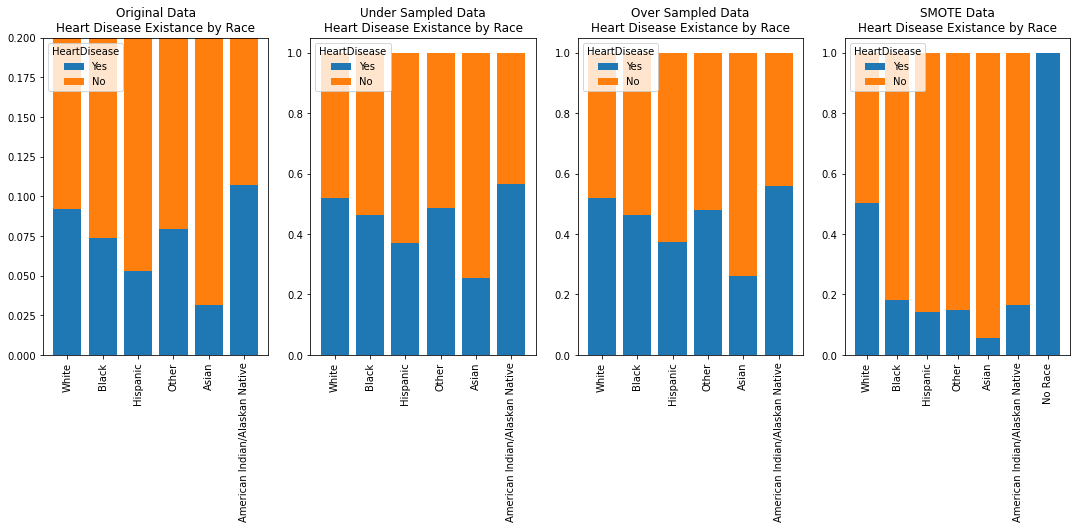

In [98]:
# Create plots of percentage for heart disease existance by AgeCategory column
race_order = ['White', 'Black', 'Hispanic', 'Other', 'Asian', 'American Indian/Alaskan Native']
smote_race_order = ['White', 'Black', 'Hispanic', 'Other', 'Asian', 'American Indian/Alaskan Native', 'No Race']

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
plt.tight_layout()
    
# Original data plot
plt.subplot(1, 4, 1)
  # Data prepare
original_data_yes = original_df_yes.groupby(["Race"])["HeartDisease"].count() / original_df.groupby("Race")["HeartDisease"].count()
original_data_yes_df = pd.DataFrame(original_data_yes)
original_data_yes_df = original_data_yes_df.sort_values("Race", key= lambda s: s.map(race_order.index))
original_data_no = original_df_no.groupby(["Race"])["HeartDisease"].count() / original_df.groupby("Race")["HeartDisease"].count()
original_data_no_df = pd.DataFrame(original_data_no)
original_data_no_df = original_data_no_df.sort_values("Race", key= lambda s: s.map(race_order.index))

  # Plot
ax[0].bar(original_data_yes_df.index, original_data_yes_df["HeartDisease"], label="Yes")
ax[0].bar(original_data_no_df.index, original_data_no_df["HeartDisease"], bottom=original_data_yes_df["HeartDisease"], label="No")
plt.title(f"Original Data\nHeart Disease Existance by Race")
plt.xticks(rotation=90)
plt.ylim(0, 0.2)
plt.legend(title="HeartDisease", loc="upper left")    
    
# Under sampled data plot
plt.subplot(1, 4, 2)
  # Data prepare
under_data_yes = under_sampled_df_yes.groupby(["Race"])["HeartDisease"].count() / under_sampled_df.groupby("Race")["HeartDisease"].count()
under_data_yes_df = pd.DataFrame(under_data_yes)
under_data_yes_df = under_data_yes_df.sort_values("Race", key= lambda s: s.map(race_order.index))
under_data_no = under_sampled_df_no.groupby(["Race"])["HeartDisease"].count() / under_sampled_df.groupby("Race")["HeartDisease"].count()
under_data_no_df = pd.DataFrame(under_data_no)
under_data_no_df = under_data_no_df.sort_values("Race", key= lambda s: s.map(race_order.index))

  # Plot
ax[1].bar(under_data_yes_df.index, under_data_yes_df["HeartDisease"], label="Yes")
ax[1].bar(under_data_no_df.index, under_data_no_df["HeartDisease"], bottom=under_data_yes_df["HeartDisease"], label="No")
plt.title(f"Under Sampled Data\nHeart Disease Existance by Race")
plt.xticks(rotation=90)
plt.legend(title="HeartDisease", loc="upper left")

# Under sampled data plots 
plt.subplot(1, 4, 3)
  # Data prepare
over_data_yes = over_sampled_df_yes.groupby(["Race"])["HeartDisease"].count() / over_sampled_df.groupby("Race")["HeartDisease"].count()
over_data_yes_df = pd.DataFrame(over_data_yes)
over_data_yes_df = over_data_yes_df.sort_values("Race", key= lambda s: s.map(race_order.index))
over_data_no = over_sampled_df_no.groupby(["Race"])["HeartDisease"].count() / over_sampled_df.groupby("Race")["HeartDisease"].count()
over_data_no_df = pd.DataFrame(over_data_no)
over_data_no_df = over_data_no_df.sort_values("Race", key= lambda s: s.map(race_order.index))

  # Plot
ax[2].bar(over_data_yes_df.index, over_data_yes_df["HeartDisease"], label="Yes")
ax[2].bar(over_data_no_df.index, over_data_no_df["HeartDisease"], bottom=over_data_yes_df["HeartDisease"], label="No")
plt.title(f"Over Sampled Data\nHeart Disease Existance by Race")
plt.xticks(rotation=90)
plt.legend(title="HeartDisease", loc="upper left")

# SMOTE data plots 
plt.subplot(1, 4, 4)
  # Data prepare
smote_df_yes = smote_df[smote_df["HeartDisease"]==1]
smote_df_no = smote_df[smote_df["HeartDisease"]==0]

smote_data_yes = smote_df_yes.groupby(["Race"])["HeartDisease"].count() / smote_df.groupby("Race")["HeartDisease"].count()
smote_data_yes_df = pd.DataFrame(smote_data_yes)
smote_data_yes_df = smote_data_yes_df.sort_values("Race", key= lambda s: s.map(smote_race_order.index))

smote_data_no = smote_df_no.groupby(["Race"])["HeartDisease"].count() / smote_df.groupby("Race")["HeartDisease"].count()
smote_data_no["No Race"] = 0
smote_data_no_df = pd.DataFrame(smote_data_no)
smote_data_no_df = smote_data_no_df.sort_values("Race", key= lambda s: s.map(smote_race_order.index))

  # Plot
ax[3].bar(smote_data_yes_df.index, smote_data_yes_df["HeartDisease"], label="Yes")
ax[3].bar(smote_data_no_df.index, smote_data_no_df["HeartDisease"], bottom=smote_data_yes_df["HeartDisease"], label="No")
plt.title(f"SMOTE Data\nHeart Disease Existance by Race")
plt.xticks(rotation=90)
plt.ylim(0, 1.05)
plt.legend(title="HeartDisease", loc="upper left")

    
plt.show()

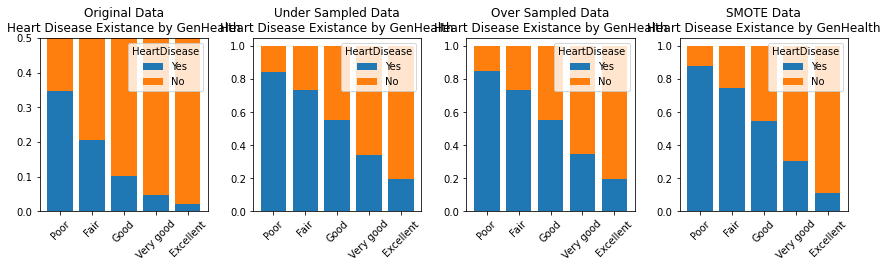

In [99]:
# Create plots of percentage for heart disease existance by GenHealth column

health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
smote_health_order = [0, 1, 2, 3, 4]

fig, ax = plt.subplots(1, 4, figsize=(12, 3))
plt.tight_layout()
 
# Original data plot
plt.subplot(1, 4, 1)
  # Data prepare
original_data_yes = original_df_yes.groupby(["GenHealth"])["HeartDisease"].count() / original_df.groupby("GenHealth")["HeartDisease"].count()
original_data_yes_df = pd.DataFrame(original_data_yes)
original_data_yes_df = original_data_yes_df.sort_values("GenHealth", key= lambda s: s.map(health_order.index))
original_data_no = original_df_no.groupby(["GenHealth"])["HeartDisease"].count() / original_df.groupby("GenHealth")["HeartDisease"].count()
original_data_no_df = pd.DataFrame(original_data_no)
original_data_no_df = original_data_no_df.sort_values("GenHealth", key= lambda s: s.map(health_order.index))

  # Plot
ax[0].bar(original_data_yes_df.index, original_data_yes_df["HeartDisease"], label="Yes")
ax[0].bar(original_data_no_df.index, original_data_no_df["HeartDisease"], bottom=original_data_yes_df["HeartDisease"], label="No")
plt.title(f"Original Data\nHeart Disease Existance by GenHealth")
plt.xticks(rotation=45)
plt.ylim(0, 0.5)
plt.legend(title="HeartDisease", loc="upper right")    
    
# Under sampled data plot
plt.subplot(1, 4, 2)
  # Data prepare
under_data_yes = under_sampled_df_yes.groupby(["GenHealth"])["HeartDisease"].count() / under_sampled_df.groupby("GenHealth")["HeartDisease"].count()
under_data_yes_df = pd.DataFrame(under_data_yes)
under_data_yes_df = under_data_yes_df.sort_values("GenHealth", key= lambda s: s.map(health_order.index))
under_data_no = under_sampled_df_no.groupby(["GenHealth"])["HeartDisease"].count() / under_sampled_df.groupby("GenHealth")["HeartDisease"].count()
under_data_no_df = pd.DataFrame(under_data_no)
under_data_no_df = under_data_no_df.sort_values("GenHealth", key= lambda s: s.map(health_order.index))

  # Plot
ax[1].bar(under_data_yes_df.index, under_data_yes_df["HeartDisease"], label="Yes")
ax[1].bar(under_data_no_df.index, under_data_no_df["HeartDisease"], bottom=under_data_yes_df["HeartDisease"], label="No")
plt.title(f"Under Sampled Data\nHeart Disease Existance by GenHealth")
plt.xticks(rotation=45)
plt.legend(title="HeartDisease", loc="upper right")

# Over sampled data plots 
plt.subplot(1, 4, 3)
  # Data prepare  
over_data_yes = over_sampled_df_yes.groupby(["GenHealth"])["HeartDisease"].count() /over_sampled_df.groupby("GenHealth")["HeartDisease"].count()
over_data_yes_df = pd.DataFrame(over_data_yes)
over_data_yes_df = over_data_yes_df.sort_values("GenHealth", key= lambda s: s.map(health_order.index))
over_data_no = over_sampled_df_no.groupby(["GenHealth"])["HeartDisease"].count() / over_sampled_df.groupby("GenHealth")["HeartDisease"].count()
over_data_no_df = pd.DataFrame(over_data_no)
over_data_no_df = over_data_no_df.sort_values("GenHealth", key= lambda s: s.map(health_order.index))

  # Plot
ax[2].bar(over_data_yes_df.index, over_data_yes_df["HeartDisease"], label="Yes")
ax[2].bar(over_data_no_df.index, over_data_no_df["HeartDisease"], bottom=over_data_yes_df["HeartDisease"], label="No")
plt.title(f"Over Sampled Data\nHeart Disease Existance by GenHealth")
plt.xticks(rotation=45)
plt.legend(title="HeartDisease", loc="upper right")
    
   # SMOTE data plots 
plt.subplot(1, 4, 4)
  # Data prepare
smote_data_yes = smote_df_yes.groupby(["GenHealth"])["HeartDisease"].count() / smote_df.groupby("GenHealth")["HeartDisease"].count()
smote_data_yes_df = pd.DataFrame(smote_data_yes)
smote_data_yes_df = smote_data_yes_df.sort_values("GenHealth", key= lambda s: s.map(smote_health_order.index))

smote_data_no = smote_df_no.groupby(["GenHealth"])["HeartDisease"].count() / smote_df.groupby("GenHealth")["HeartDisease"].count()
smote_data_no_df = pd.DataFrame(smote_data_no)
smote_data_no_df = smote_data_no_df.sort_values("GenHealth", key= lambda s: s.map(smote_health_order.index))

  # Plot
ax[3].bar(smote_data_yes_df.index, smote_data_yes_df["HeartDisease"], label="Yes")
ax[3].bar(smote_data_no_df.index, smote_data_no_df["HeartDisease"], bottom=smote_data_yes_df["HeartDisease"], label="No")
plt.title(f"SMOTE Data\nHeart Disease Existance by GenHealth")
plt.xticks([0, 1, 2, 3, 4], health_order, rotation=45)
plt.legend(title="HeartDisease", loc="upper right")
        
plt.show()

In [100]:
under_sampled_df.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'PhysicalHealth', 'MentalHealth',
       'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'PhysicalActivity',
       'GenHealth', 'SleepTime', 'Asthma', 'HeartDisease'],
      dtype='object')

## Findings Summary
* The distribution of heart disease existence across all columns of under-sampled data and over-sampled data are pretty much the same.
* I used same number of random state for train test split for SMOTE and other sampling methods, so the data splited the same way. However, some of the fetures' percentage for heart disease existance in SMOTE data is different than the other sampled data.


* The difference between both percentage for heart disease existance by smoking in SMOTE data are smaller than the other data's
* The difference between both percentage for heart disease existance by alcoholdrinking in SMOTE data are bigger than the other data's.
* The percentage of people who has both asthma and heart disease is greater than the percentage of people who doesn't have asthma but heart disease in all data set except SMOTE data.


* From the histgrams and box plots of continuance value columns, I don't really see big difference besides the yes values of original data are very low.


* From the plots of heart disease existance by sex, all data sets have similar shape of plot except SMOTE data. The balance of heart disease existance by sex in SMOTE data is almost same.


* From the plots of heart disease existance by age, the original data plot has a gentle slope on the left side then the slop become steep.
* In the other data, it looks like they have a little bit steep slope in the middle of the age, but it's basically gentle spole in total.


* From the plots of heart disease existance by race, all data has almost the same shape except SMOTE data. 
* SMOTE data looks have almost same percentage for white people. However, it got unknown nationality rows and that made reduced other nationality percentage.

#### Prepare for next step

Now, I have 4 data set, which are original data set, under sampling data set, over sampling data set and SMOTE data set. For using same data easily, I'll save those data set as csv. Also. I created new columns for EDA, but I don't need for further process, so I'll remove those columns before saving as csv.

In [101]:
smote_df

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,...,Asthma,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,HeartDisease,Cut_AgeCategory,Race
0,27.120000,1,0,0.000000,2.0,0,1,35,0,3,...,0,0,0,0,0,0,1,0,35-39,White
1,30.230000,0,0,0.000000,0.0,0,0,18,0,2,...,0,0,0,0,1,0,0,0,18-24,Hispanic
2,32.550000,0,0,0.000000,0.0,0,1,60,1,3,...,0,0,0,0,0,0,1,0,60-64,White
3,33.070000,0,0,0.000000,0.0,0,0,55,1,3,...,0,0,0,0,1,0,0,0,55-59,Hispanic
4,23.060000,0,0,0.000000,0.0,0,1,30,1,4,...,0,0,0,1,0,0,0,0,30-34,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408515,25.856492,0,0,8.427705,10.0,0,0,80,0,1,...,0,0,0,0,0,0,1,1,80 or older,White
408516,27.176702,0,0,0.000000,0.0,0,1,65,1,3,...,0,0,0,0,0,0,1,1,65-69,White
408517,24.343159,1,0,0.000000,0.0,0,1,70,1,2,...,0,0,0,0,0,0,0,1,70-74,No Race
408518,32.141741,1,0,2.000000,0.0,0,1,75,1,2,...,0,0,0,0,0,0,1,1,75-79,White


In [102]:
smote_df = smote_df.drop(columns=["Cut_AgeCategory", "Race"])
smote_df

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,HeartDisease
0,27.120000,1,0,0.000000,2.0,0,1,35,0,3,8.000000,0,0,0,0,0,0,1,0
1,30.230000,0,0,0.000000,0.0,0,0,18,0,2,7.000000,0,0,0,0,1,0,0,0
2,32.550000,0,0,0.000000,0.0,0,1,60,1,3,6.000000,0,0,0,0,0,0,1,0
3,33.070000,0,0,0.000000,0.0,0,0,55,1,3,6.000000,0,0,0,0,1,0,0,0
4,23.060000,0,0,0.000000,0.0,0,1,30,1,4,7.000000,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408515,25.856492,0,0,8.427705,10.0,0,0,80,0,1,9.371082,0,0,0,0,0,0,1,1
408516,27.176702,0,0,0.000000,0.0,0,1,65,1,3,7.000000,0,0,0,0,0,0,1,1
408517,24.343159,1,0,0.000000,0.0,0,1,70,1,2,8.000000,0,0,0,0,0,0,0,1
408518,32.141741,1,0,2.000000,0.0,0,1,75,1,2,7.918155,0,0,0,0,0,0,1,1


In [103]:
# train set (both X and y)
under_sampled_df.to_csv("under_sampled_df.csv", index=False)
over_sampled_df.to_csv("over_sampled_df.csv", index=False)
smote_df.to_csv("smote_df.csv", index=False)

# test set for under and over sampling
test_sampled_df = X_test
test_sampled_df["HeartDisease"] = y_test
test_sampled_df.to_csv("test_sampled_df.csv", index=False)

# test set for SMOTE
test_smote_df = X_s_test
test_smote_df["HeartDisease"] = y_s_test
test_smote_df.to_csv("test_smote_df.csv", index=False)